<h1 style="text-align: center; font-size:40px; color:red">WriteUp</h1>


### **WU1** ###

mean((datasets.TennisData.Y > 0) == (h.predictAll(datasets.TennisData.X) > 0))<br>
is equivalent to computing classification accuracy because == operator will return 1 one true and 0 on false based one whether prediction on training dataset X was correct or wrong based on Y, the actual result array of training dataset defined in the Tennis Data.   Therefore, what the mean is really doing is finding the ratio of actual answer to the prediction which should give the accuracy of the prediction.


### **WU2** ### 

Training classifier on 2 points...
Training accuracy 1, test accuracy 0.5
Training classifier on 3 points...
Training accuracy 1, test accuracy 0.5
Training classifier on 5 points...
Training accuracy 1, test accuracy 0.5
Training classifier on 10 points...
Training accuracy 1, test accuracy 0.595
Training classifier on 19 points...
Training accuracy 1, test accuracy 0.48
Training classifier on 38 points...
Training accuracy 1, test accuracy 0.62
Training classifier on 75 points...
Training accuracy 1, test accuracy 0.56
Training classifier on 150 points...
Training accuracy 0.953333, test accuracy 0.56
Training classifier on 300 points...
Training accuracy 0.926667, test accuracy 0.575
Training classifier on 600 points...
Training accuracy 0.881667, test accuracy 0.5975
Training classifier on 1200 points...
Training accuracy 0.833333, test accuracy 0.6475


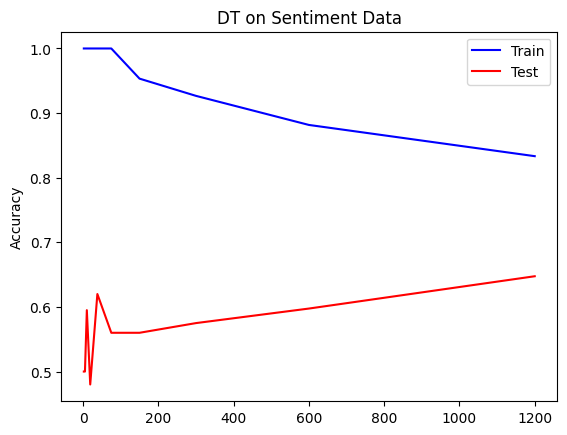

In [48]:
import runClassifier
import dt
import datasets

curve = runClassifier.learningCurveSet(dt.DT({'maxDepth': 9}), datasets.SentimentData)
runClassifier.plotCurve('DT on Sentiment Data', curve)

The training accuracy tends to go down since the learning Curve function in the run Classifier works in such way that it starts with small number of points by selecting every 2^(M-i) point where M = int(ceil(log2(N)) and ‘i’ goes to 1 to M.   In other words, the learning curve function starts learning with a very small number of points which leads to overfitting and are unable to generalize due to small number of samples. 
<br><br>
At each iteration, more data points are used to train. As the data size grows, the model is less likely to be able to fit all the specific cases of training dataset thus why the training accuracy decreases with more data points and prevent overfitting increasing generalizability leading to higher test accuracy.
<br><br>
However, test accuracy does not monotonically increase since adding more data can also introduce more noise and if the model is able to fit to those noises, the model becomes more specific to the training dataset and thus loses test accuracy. 
<br><br>

### **WU3** ###

Training classifier with maxDepth=1...
Training accuracy 0.630833, test accuracy 0.595
Training classifier with maxDepth=2...
Training accuracy 0.6675, test accuracy 0.5825
Training classifier with maxDepth=4...
Training accuracy 0.7325, test accuracy 0.6375
Training classifier with maxDepth=6...
Training accuracy 0.789167, test accuracy 0.635
Training classifier with maxDepth=8...
Training accuracy 0.823333, test accuracy 0.6475
Training classifier with maxDepth=12...
Training accuracy 0.863333, test accuracy 0.6425
Training classifier with maxDepth=16...
Training accuracy 0.888333, test accuracy 0.625


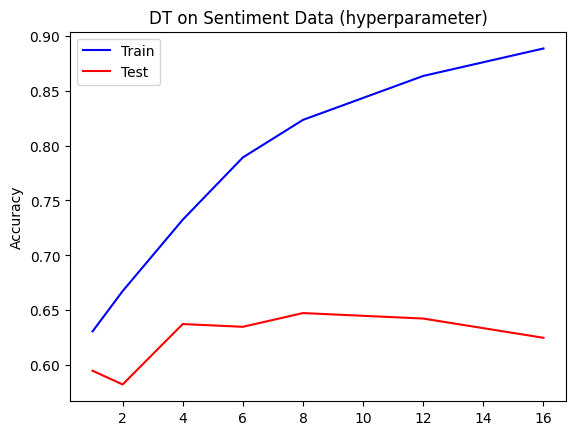

In [49]:
curve = runClassifier.hyperparamCurveSet(dt.DT({}), 'maxDepth', [1,2,4,6,8,12,16], datasets.SentimentData)
runClassifier.plotCurve('DT on Sentiment Data (hyperparameter)', curve)

**It is guaranteed that the training accuracy increases:**<br>
The hyperparmCurve function trains at each iteration with maximum tree depth. This means that at each iteration, we can split into more features.   As we consider more features for classification, the accuracy increases as the model will consider more and more specific cases of the training data for classification. Therefore, it is guaranteed that the training accuracy increases as the max depth increases until the model fits the training data exactly if we keep increasing the max depth.<br><br>

**It is not guaranteed for test accuracy to make a hill shape:**<br>
On the test accuracy side, since we start with max depth of 1, it is likely underfitting starting with low test accuracy.  As the max depth increases, models could learn more from the training potentially leading to higher accuracy.   As the max depth increases further, the model starts to become specific to the training dataset leading to a decrease in test accuracy.  While this is generally expected behavior, it is not guaranteed behavior.

### **WU4** ###

**Generating  train/test curves for varying values of ε:**<br>

In [4]:
import knn
import datasets

Training classifier with eps=1...
Training accuracy 1, test accuracy 0.5
Training classifier with eps=2...
Training accuracy 1, test accuracy 0.5
Training classifier with eps=3...
Training accuracy 1, test accuracy 0.5
Training classifier with eps=4...
Training accuracy 1, test accuracy 0.51
Training classifier with eps=5...
Training accuracy 1, test accuracy 0.52
Training classifier with eps=6...
Training accuracy 0.96, test accuracy 0.64
Training classifier with eps=7...
Training accuracy 0.93, test accuracy 0.74
Training classifier with eps=8...
Training accuracy 0.88, test accuracy 0.81
Training classifier with eps=9...
Training accuracy 0.85, test accuracy 0.83
Training classifier with eps=10...
Training accuracy 0.74, test accuracy 0.74
Training classifier with eps=11...
Training accuracy 0.65, test accuracy 0.67
Training classifier with eps=12...
Training accuracy 0.51, test accuracy 0.52
Training classifier with eps=13...
Training accuracy 0.5, test accuracy 0.5
Training classi

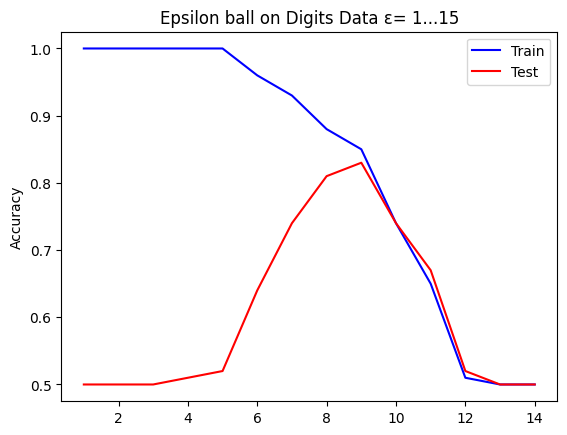

In [37]:
#Generating train/test curves for varying Epsilon
curve = runClassifier.hyperparamCurveSet(knn.KNN({'isKNN':False}), 'eps',range(1,15,1),datasets.DigitData)
#plotting the curve
runClassifier.plotCurve('Epsilon ball on Digits Data ε= 1...15',curve)


For Epsion ball from the graph above, we can clearly see overfitting.
The amount of overfit is very large at low Epsilon value, then the overfit amount starts to rapidly decline around
epsilon = 5.  

The Test accuracy peaks at around epsion =9  then the model starts to underfit as both training accuracy and Test accuracy starts to degrade.


**Generating train/test curves for varying values of K**

Training classifier with K=1...
Training accuracy 1, test accuracy 0.94
Training classifier with K=2...
Training accuracy 0.94, test accuracy 0.93
Training classifier with K=3...
Training accuracy 0.94, test accuracy 0.93
Training classifier with K=4...
Training accuracy 0.91, test accuracy 0.9
Training classifier with K=5...
Training accuracy 0.92, test accuracy 0.92
Training classifier with K=6...
Training accuracy 0.9, test accuracy 0.91
Training classifier with K=7...
Training accuracy 0.9, test accuracy 0.91
Training classifier with K=8...
Training accuracy 0.87, test accuracy 0.89
Training classifier with K=9...
Training accuracy 0.88, test accuracy 0.89
Training classifier with K=10...
Training accuracy 0.86, test accuracy 0.87
Training classifier with K=11...
Training accuracy 0.86, test accuracy 0.88
Training classifier with K=12...
Training accuracy 0.86, test accuracy 0.86
Training classifier with K=13...
Training accuracy 0.86, test accuracy 0.86
Training classifier with K=

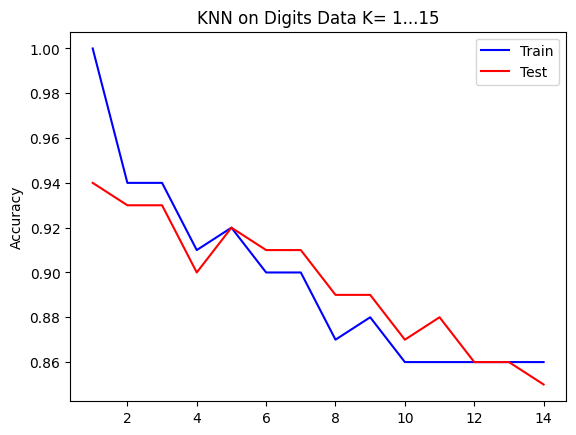

In [38]:


#Generating train/test curves for varying K
curve = runClassifier.hyperparamCurveSet(knn.KNN({'isKNN':True}), 'K',range(1,15,1), datasets.DigitData)
#plotting the curve
runClassifier.plotCurve('KNN on Digits Data K= 1...15', curve)

From the graph, we can see that the smaller the K, more accurate it is for both train and test.

While the model overfits at low vals of K < 5 , the amount of overfitting is small. 

On the otherhand, the model shows clear signs of underfitting as K becomes larger as both training and test accuracy drops.



**Generating learning curve using K =5**

Training classifier on 2 points...
Training accuracy 0.5, test accuracy 0.5
Training classifier on 4 points...
Training accuracy 0.75, test accuracy 0.5
Training classifier on 7 points...
Training accuracy 0.571429, test accuracy 0.71
Training classifier on 13 points...
Training accuracy 0.615385, test accuracy 0.81
Training classifier on 25 points...
Training accuracy 0.8, test accuracy 0.85
Training classifier on 50 points...
Training accuracy 0.88, test accuracy 0.86
Training classifier on 100 points...
Training accuracy 0.92, test accuracy 0.92


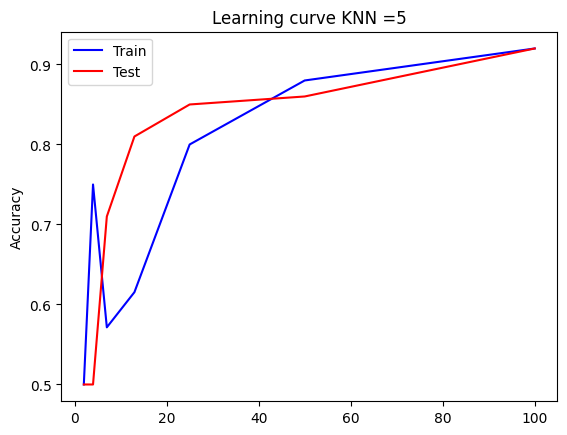

In [34]:
curve = runClassifier.learningCurveSet(knn.KNN({'isKNN':True,'K': 5}), datasets.DigitData)
runClassifier.plotCurve('Learning curve KNN =5',curve)

## **WU5** ##

#### HighD plot ####

D=2, average distance=0.52612
D=8, average distance=1.13736
D=32, average distance=2.28853
D=128, average distance=4.62117
D=512, average distance=9.24483


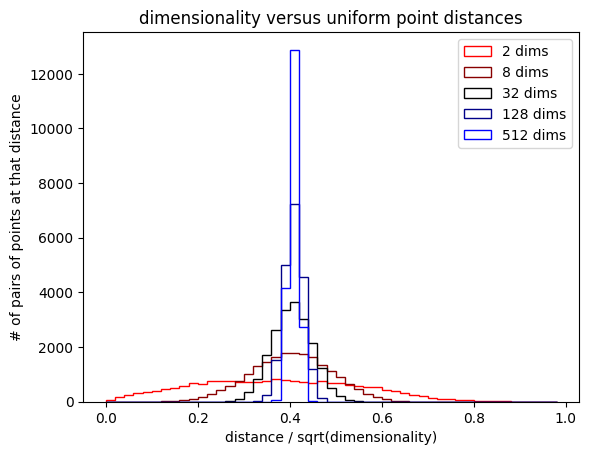

In [2]:
#HighD.py


from math import *
import random
from numpy import *
import matplotlib.pyplot as plt

waitForEnter=False

def generateUniformExample(numDim):
    return [random.random() for d in range(numDim)]

def generateUniformDataset(numDim, numEx):
    return [generateUniformExample(numDim) for n in range(numEx)]

def computeExampleDistance(x1, x2):
    dist = 0.0
    for d in range(len(x1)):
        dist += (x1[d] - x2[d]) * (x1[d] - x2[d])
    return sqrt(dist)

def computeDistances(data):
    N = len(data)
    D = len(data[0])
    dist = []
    for n in range(N):
        for m in range(n):
            dist.append(computeExampleDistance(data[n],data[m])  / sqrt(D))
    return dist

N    = 200                   # number of examples
Dims = [2, 8, 32, 128, 512]   # dimensionalities to try
Cols = ['#FF0000', '#880000', '#000000', '#000088', '#0000FF']
Bins = arange(0, 1, 0.02)

plt.xlabel('distance / sqrt(dimensionality)')
plt.ylabel('# of pairs of points at that distance')
plt.title('dimensionality versus uniform point distances')

for i,d in enumerate(Dims):
    distances = computeDistances(generateUniformDataset(d, N))
    print ("D=%d, average distance=%g" % (d, mean(distances) * sqrt(d)))
    plt.hist(distances,
             Bins,
             histtype='step',
             color=Cols[i])
    if waitForEnter:
        plt.legend(['%d dims' % d for d in Dims])
        plt.show(False)
        x = input('Press enter to continue...')


plt.legend(['%d dims' % d for d in Dims])
plt.savefig('fig.pdf')
plt.show()

###  A) Histogram of raw digits data in 784 dimensions ###

[]

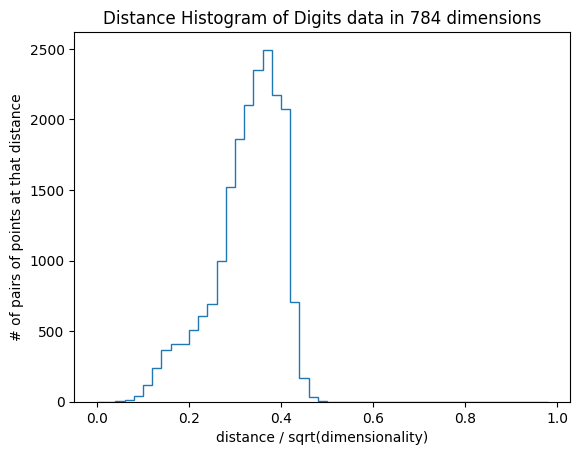

In [12]:
def computeDistances(data):
    N = len(data)
    D = len(data[0])
    dist = []
    for n in range(N):
        for m in range(n):
            dist.append(computeExampleDistance(data[n],data[m])  / sqrt(D))
    return dist


dist = computeDistances(datasets.DigitData.Xall)

plt.xlabel('distance / sqrt(dimensionality)')
plt.ylabel('# of pairs of points at that distance')
plt.title('Distance Histogram of Digits data in 784 dimensions')

plt.hist(dist,
         Bins,
         histtype='step',
         )
plt.plot()

### **B)** Rewriting computedistances so that i t can subsample features down to some fixed dimensionality. ###

In [43]:
#helper function doing actual distance calculation.
def computeSubExampleDistance(x1, x2,dims):
    dist = 0     
    for d in range(len(x1)):
        if d in dims:  #calculate distance only for those sampled dimensions
            dist += (x1[d] - x2[d]) * (x1[d] - x2[d])
    return sqrt(dist)

#calculates the distance of data for subsample features down to some fixed dimensionality d
def computeDistancesSubdims(data,d):
    N = len(data)
    D = d
    dims = random.permutation(arange(1,785))[0:d]   #getting permutation of 1..784 then getting first d numbers
    dist = []
    for n in range(N):   #data points
        for m in range(n):
            dist.append(computeSubExampleDistance(data[n],data[m],dims)  / sqrt(D))
    return dist



### **C)** Generating Equivlanet plot to HighD with d in [2,8,32,128,512] for digits data ###


D=2, average distance=0.419851
D=8, average distance=0.989306
D=32, average distance=1.90548
D=128, average distance=3.95156
D=512, average distance=7.31979


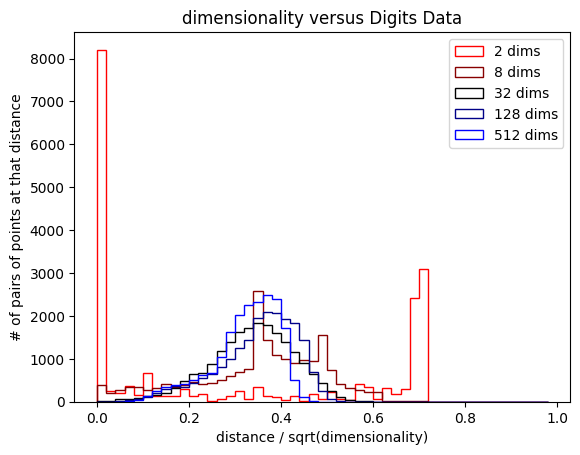

In [50]:

Dims = [2, 8, 32, 128, 512]   # dimensionalities to try
Cols = ['#FF0000', '#880000', '#000000', '#000088', '#0000FF']
Bins = arange(0, 1, 0.02)

plt.xlabel('distance / sqrt(dimensionality)')
plt.ylabel('# of pairs of points at that distance')
plt.title('dimensionality versus Digits Data')

for i,d in enumerate(Dims):
    distances = computeDistancesSubdims(datasets.DigitData.Xall,d)
    print ("D=%d, average distance=%g" % (d, mean(distances) * sqrt(d)))
    plt.hist(distances,
             Bins,
             histtype='step',
             color=Cols[i])
    

plt.legend(['%d dims' % d for d in Dims])
plt.show()

### Comparison with HighD plot ###

The distribution of the two plots varies. 
While the HighD plot from uniformly random data points showed bell curve, 
the naturally occuring data like Digit data plot seems to show no significant pattern in distribution.

In terms of concentration,
While HighD plot clearly showed patterns of direct positive relation between dimensionlaity and concentration of points around a single value, Digits data plot doesn't seem to show a clear relation between dimensionality and concentration.


### **WU6** ###
    

**A)Generating a learning curve for the perceptron (5epochs) on Sentiment data**

Training classifier on 2 points...
Training accuracy 1, test accuracy 0.51
Training classifier on 3 points...
Training accuracy 1, test accuracy 0.51
Training classifier on 5 points...
Training accuracy 1, test accuracy 0.53
Training classifier on 10 points...
Training accuracy 1, test accuracy 0.5025
Training classifier on 19 points...
Training accuracy 1, test accuracy 0.525
Training classifier on 38 points...
Training accuracy 1, test accuracy 0.5575
Training classifier on 75 points...
Training accuracy 0.986667, test accuracy 0.675
Training classifier on 150 points...
Training accuracy 0.986667, test accuracy 0.715
Training classifier on 300 points...
Training accuracy 0.99, test accuracy 0.7375
Training classifier on 600 points...
Training accuracy 0.993333, test accuracy 0.8025
Training classifier on 1200 points...
Training accuracy 0.993333, test accuracy 0.815


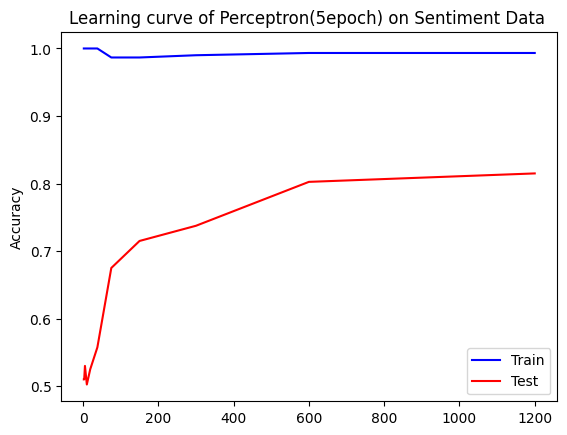

In [62]:
import perceptron

curve = runClassifier.learningCurveSet(perceptron.Perceptron({'numEpoch':5}), datasets.SentimentData)
runClassifier.plotCurve('Learning curve of Perceptron(5epoch) on Sentiment Data ', curve)

**B) Plot of number of epochs vs train/test accuracy on entire dataset**

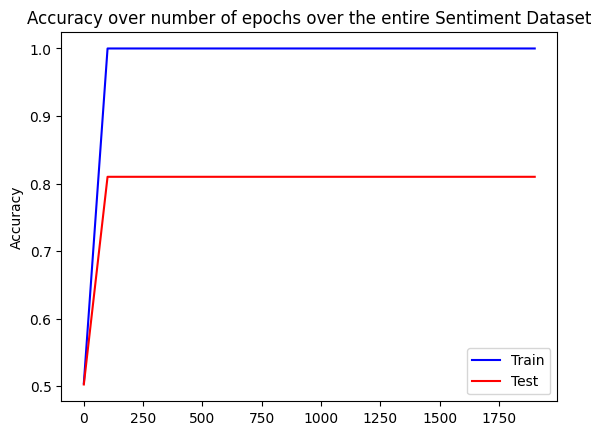

In [71]:
import sys, os
def blockPrint():
    sys.stdout = open(os.devnull, 'w')
def enablePrint():
    sys.stdout = sys.__stdout__


#curve = runClassifier.hyperparamCurveSet(perceptron.Perceptron({}), 'numEpoch',arange(0,len(datasets.SentimentData.Xall)), datasets.SentimentData)
#above code does 2000 epoch and takes too long.

blockPrint()  #graph shows result. print out too long. comment out to see written result
curve = runClassifier.hyperparamCurveSet(perceptron.Perceptron({}), 'numEpoch',arange(0,len(datasets.SentimentData.Xall),100), datasets.SentimentData)
enablePrint()
runClassifier.plotCurve('Accuracy over number of epochs over the entire Sentiment Dataset', curve)
